In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import entropy
import seaborn as sn

destDatasetPath = "../dataset/users_clean_with_indicators_with_outliers.h5"

In [2]:
%%time
dataseUsersCleanedPath = "../dataset/users_clean_with_outliers.h5"
df_users = pd.read_hdf(dataseUsersCleanedPath)

CPU times: total: 172 ms
Wall time: 190 ms


In [3]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_clean_with_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: total: 12.2 s
Wall time: 12.5 s


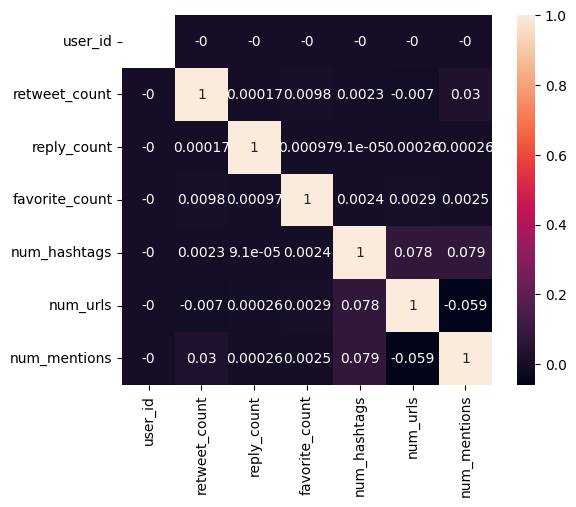

In [4]:
corr_matrix = df_tweets.corr()
fig, ax = plt.subplots()
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

## Tweet_length

In [5]:
df_tweets["tweet_length"] = df_tweets["text"].apply(lambda x: len(x))

In [6]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42
...,...,...,...,...,...,...,...,...,...,...
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19
11712086,2.209330e+08,0,0,0,0,0,0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...,58
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48


In [7]:
def count_special_characters(text):
    counter = 0
   
    for i in range(0, len(text)):
        if (not (text[i].isalpha() or text[i].isdigit()) and text[i] != ' '):
            counter += 1
    
    return counter

## num_special_chars

In [8]:
df_tweets["num_special_chars"] = df_tweets["text"].apply(count_special_characters)

In [9]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length,num_special_chars
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64,2
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101,14
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19,1
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85,2
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42,4
...,...,...,...,...,...,...,...,...,...,...,...
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19,3
11712086,2.209330e+08,0,0,0,0,0,0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...,58,3
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118,5
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48,2


#### tweets_count: how many tweets were published by the user

In [10]:
df_counts = df_tweets.user_id.value_counts().to_frame("tweet_count")
df_counts

,tweet_count
-1.000000e+00,213715
4.916306e+08,3926
1.693275e+09,3906
1.570298e+08,3901
7.004532e+06,3897
...,...
1.373570e+09,1
6.000000e+01,1
1.726000e+03,1
8.490000e+02,1


In [11]:
df_users = df_users.merge(df_counts, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count
2353593986,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127
2358850842,lourie botton,en,0,2019-02-26 03:02:32,54.0,116
137959629,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3
466124818,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378
2571493866,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506
...,...,...,...,...,...,...
2911861962,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066
1378532629,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003
126984069,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6
2383025796,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101


In [12]:
count_peruser = df_tweets.groupby(["user_id"]).sum()
count_peruser

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
user_id,,,,,,,,
-1.000000e+00,96712376,200931,1188367,31965,30259,93679,15724946,1110882
0.000000e+00,93,0,1,0,0,1,296,25
2.000000e+00,0,0,0,0,0,0,66,9
3.000000e+00,0,0,0,0,0,3,67,8
5.000000e+00,0,0,0,0,0,0,192,6
...,...,...,...,...,...,...,...,...
4.800000e+64,0,0,0,0,0,0,20,5
3.300000e+66,0,0,0,0,0,0,0,0
4.000000e+95,1,0,0,0,0,0,0,0


In [13]:
std_peruser = df_tweets.groupby(["user_id"]).apply(np.std)

c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [14]:
std_peruser

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,tweet_length,num_special_chars
user_id,,,,,,,,,,
-1.000000e+00,0.0,8880.143332,163.809995,1527.869572,0.575563,0.362908,0.767652,260 days 23:05:07.145700288,38.384372,5.619868
0.000000e+00,0.0,32.050741,0.000000,0.372678,0.000000,0.000000,0.372678,80 days 03:30:22.327997713,32.448249,3.131382
2.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48 days 14:39:25.500000,33.000000,4.500000
3.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,851 days 18:16:38.803556736,25.486380,3.091206
5.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101 days 23:57:48.500000,26.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
4.800000e+64,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
3.300000e+66,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
4.000000e+95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000


In [15]:
df_tweets.groupby(["user_id"])["retweet_count"].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
-1.000000e+00,213715.0,452.529659,8880.164108,0.0,0.0,0.0,0.0,2098844.0
0.000000e+00,6.0,15.500000,35.109828,0.0,0.0,0.0,4.5,87.0
2.000000e+00,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3.000000e+00,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5.000000e+00,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4.800000e+64,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
3.300000e+66,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
4.000000e+95,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [16]:
std_peruser.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,tweet_length,num_special_chars
count,12142.0,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142,12142.000000,12142.000000
mean,0.0,2356.751530,5.692061,85.405956,0.388754,0.147816,0.403074,385 days 03:38:26.632644600,35.364482,5.654807
std,0.0,11100.037470,98.261319,1363.236210,0.313390,0.177617,0.325088,2212 days 15:04:25.078764256,11.445867,6.733061
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,0.0,0.130724,0.000000,0.132860,0.219340,0.000000,0.065146,26 days 11:55:39.300284874,33.869087,2.828390
50%,0.0,0.306892,0.000000,0.255147,0.341708,0.112834,0.463034,38 days 20:30:58.325119253,36.962049,3.750262
75%,0.0,822.420562,0.000000,0.732474,0.497723,0.255176,0.590820,85 days 19:00:40.787928623,39.606805,4.997439
max,0.0,338366.011994,5248.637564,50414.875091,7.574514,4.499433,3.639834,18866 days 08:39:13.076987648,162.000000,120.500000


In [17]:
def add_avg_column(df, attr_count, attr, ):
    newColumnTitle = attr+"_avg"
    df[newColumnTitle] = attr_count[attr] / df["tweet_count"]

In [18]:
add_avg_column(df_users, count_peruser, "retweet_count")
add_avg_column(df_users, count_peruser, "reply_count")
add_avg_column(df_users, count_peruser, "favorite_count")
add_avg_column(df_users, count_peruser, "num_hashtags")
add_avg_column(df_users, count_peruser, "num_urls")
add_avg_column(df_users, count_peruser, "num_mentions")
add_avg_column(df_users, count_peruser, "tweet_length")
add_avg_column(df_users, count_peruser, "num_special_chars")
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
2353593986,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127,0.039370,0.0,0.039370,0.102362,0.000000,0.275591,63.409449,3.952756
2358850842,lourie botton,en,0,2019-02-26 03:02:32,54.0,116,0.025862,0.0,0.051724,0.025862,0.000000,0.353448,69.672414,3.500000
137959629,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333
466124818,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378,0.861393,0.0,0.185051,0.080552,0.025399,0.006531,88.524673,4.818578
2571493866,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506,0.017399,0.0,0.063605,0.129492,0.000856,0.522533,73.765830,3.669994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066,6152.263602,0.0,0.059099,0.212946,0.029081,0.777674,53.581614,5.070356
1378532629,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003,395.651523,0.0,0.221168,0.125811,0.100349,0.542686,60.890664,4.344983
126984069,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,0.666667,0.333333,67.666667,6.666667
2383025796,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101,0.069307,0.0,0.089109,0.009901,0.000000,0.376238,63.910891,3.930693


In [19]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5750.093500,940.685871,362.744886,0.369431,17.567901,0.154632,0.090168,0.360214,69.420737,5.618642
std,0.499031,18752.596595,1227.536451,2180.431575,7.723115,362.633067,0.230345,0.181239,0.367936,16.519805,5.589786
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,42.000000,65.000000,0.023810,0.000000,0.024031,0.050000,0.000000,0.010623,60.634728,3.722736
50%,1.000000,71.000000,132.000000,0.108611,0.000000,0.064698,0.085106,0.017844,0.315385,66.760846,4.500412
75%,1.000000,2520.250000,1700.000000,117.474227,0.000000,0.269265,0.170313,0.078116,0.524956,78.873718,5.709773
max,1.000000,399555.000000,3926.000000,63995.214286,621.666667,22559.916667,6.430140,2.000000,5.782609,245.000000,145.500000


In [20]:
df_users = df_users.merge(count_peruser, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,...,tweet_length_avg,num_special_chars_avg,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
2353593986,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127,0.039370,0.0,0.039370,0.102362,...,63.409449,3.952756,5,0,5,13,0,35,8053,502
2358850842,lourie botton,en,0,2019-02-26 03:02:32,54.0,116,0.025862,0.0,0.051724,0.025862,...,69.672414,3.500000,3,0,6,3,0,41,8082,406
137959629,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,...,17.333333,4.333333,0,0,0,0,0,0,52,13
466124818,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378,0.861393,0.0,0.185051,0.080552,...,88.524673,4.818578,1187,0,255,111,35,9,121987,6640
2571493866,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506,0.017399,0.0,0.063605,0.129492,...,73.765830,3.669994,61,0,223,454,3,1832,258623,12867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066,6152.263602,0.0,0.059099,0.212946,...,53.581614,5.070356,6558313,0,63,227,31,829,57118,5405
1378532629,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003,395.651523,0.0,0.221168,0.125811,...,60.890664,4.344983,792490,0,443,252,201,1087,121964,8703
126984069,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,...,67.666667,6.666667,0,0,0,2,4,2,406,40
2383025796,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101,0.069307,0.0,0.089109,0.009901,...,63.910891,3.930693,7,0,9,1,0,38,6455,397


In [21]:
df_users.dtypes

name                             object
lang                             object
bot                               int64
created_at               datetime64[ns]
statuses_count                  float64
tweet_count                       int64
retweet_count_avg               float64
reply_count_avg                 float64
favorite_count_avg              float64
num_hashtags_avg                float64
num_urls_avg                    float64
num_mentions_avg                float64
tweet_length_avg                float64
num_special_chars_avg           float64
retweet_count                     int64
reply_count                       int64
favorite_count                    int64
num_hashtags                      int64
num_urls                          int64
num_mentions                      int64
tweet_length                      int64
num_special_chars                 int64
dtype: object

In [22]:
df_tweets.dtypes

user_id                     float64
retweet_count                 int64
reply_count                   int64
favorite_count                int64
num_hashtags                  int64
num_urls                      int64
num_mentions                  int64
created_at           datetime64[ns]
text                         object
tweet_length                  int64
num_special_chars             int64
dtype: object

In [23]:
def compute_entropy(tweets, column):
    new_column_name = column+"_entropy"
    new_column = tweets.groupby(['user_id'])[column].apply(entropy).to_frame(new_column_name)
    new_column.fillna(0, inplace=True)
    return df_users.merge(new_column, how="inner", left_index=True, right_index=True)

In [24]:
new_column = df_tweets.groupby(['user_id'])["reply_count"].apply(entropy).to_frame("reply_count_entr")
new_column.fillna(0, inplace=True)

c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_entropy.py:77: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [25]:
new_column.value_counts()

reply_count_entr
0.000000            11064
0.693147              340
1.098612              136
1.386294               68
0.636514               44
                    ...  
1.153742                1
1.131748                1
1.123083                1
1.098612                1
7.069189                1
Length: 330, dtype: int64

In [26]:
df_users = compute_entropy(df_tweets, "retweet_count")
df_users = compute_entropy(df_tweets, "reply_count")
df_users = compute_entropy(df_tweets, "favorite_count")
df_users = compute_entropy(df_tweets, "num_hashtags")
df_users = compute_entropy(df_tweets, "num_urls")
df_users = compute_entropy(df_tweets, "num_mentions")
df_users = compute_entropy(df_tweets, "tweet_length")
df_users = compute_entropy(df_tweets, "num_special_chars")
df_users


,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,...,tweet_length,num_special_chars,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_urls_entropy,num_mentions_entropy,tweet_length_entropy,num_special_chars_entropy
2353593986,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127,0.039370,0.0,0.039370,0.102362,...,8053,502,1.609438,0.0,1.609438,1.951260,0.000000,3.555348,4.654218,4.331262
2358850842,lourie botton,en,0,2019-02-26 03:02:32,54.0,116,0.025862,0.0,0.051724,0.025862,...,8082,406,1.098612,0.0,1.791759,1.098612,0.000000,3.713572,4.580228,4.430671
137959629,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,...,52,13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.051954,1.057905
466124818,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378,0.861393,0.0,0.185051,0.080552,...,121987,6640,2.164284,0.0,5.155743,3.993476,3.555348,1.831020,7.138666,6.917765
2571493866,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506,0.017399,0.0,0.063605,0.129492,...,258623,12867,3.965939,0.0,5.332573,5.842069,1.098612,7.339108,8.061385,7.993446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066,6152.263602,0.0,0.059099,0.212946,...,57118,5405,4.804405,0.0,4.016500,4.915112,3.389268,6.361533,6.764719,6.665332
1378532629,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003,395.651523,0.0,0.221168,0.125811,...,121964,8703,3.556523,0.0,5.770773,5.253873,5.296408,6.678788,7.394807,7.288604
126984069,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,...,406,40,0.000000,0.0,0.000000,0.693147,1.386294,0.693147,1.714799,1.461833
2383025796,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101,0.069307,0.0,0.089109,0.009901,...,6455,397,1.747868,0.0,2.197225,0.000000,0.000000,3.637586,4.384845,4.325200


## Correlation matrix

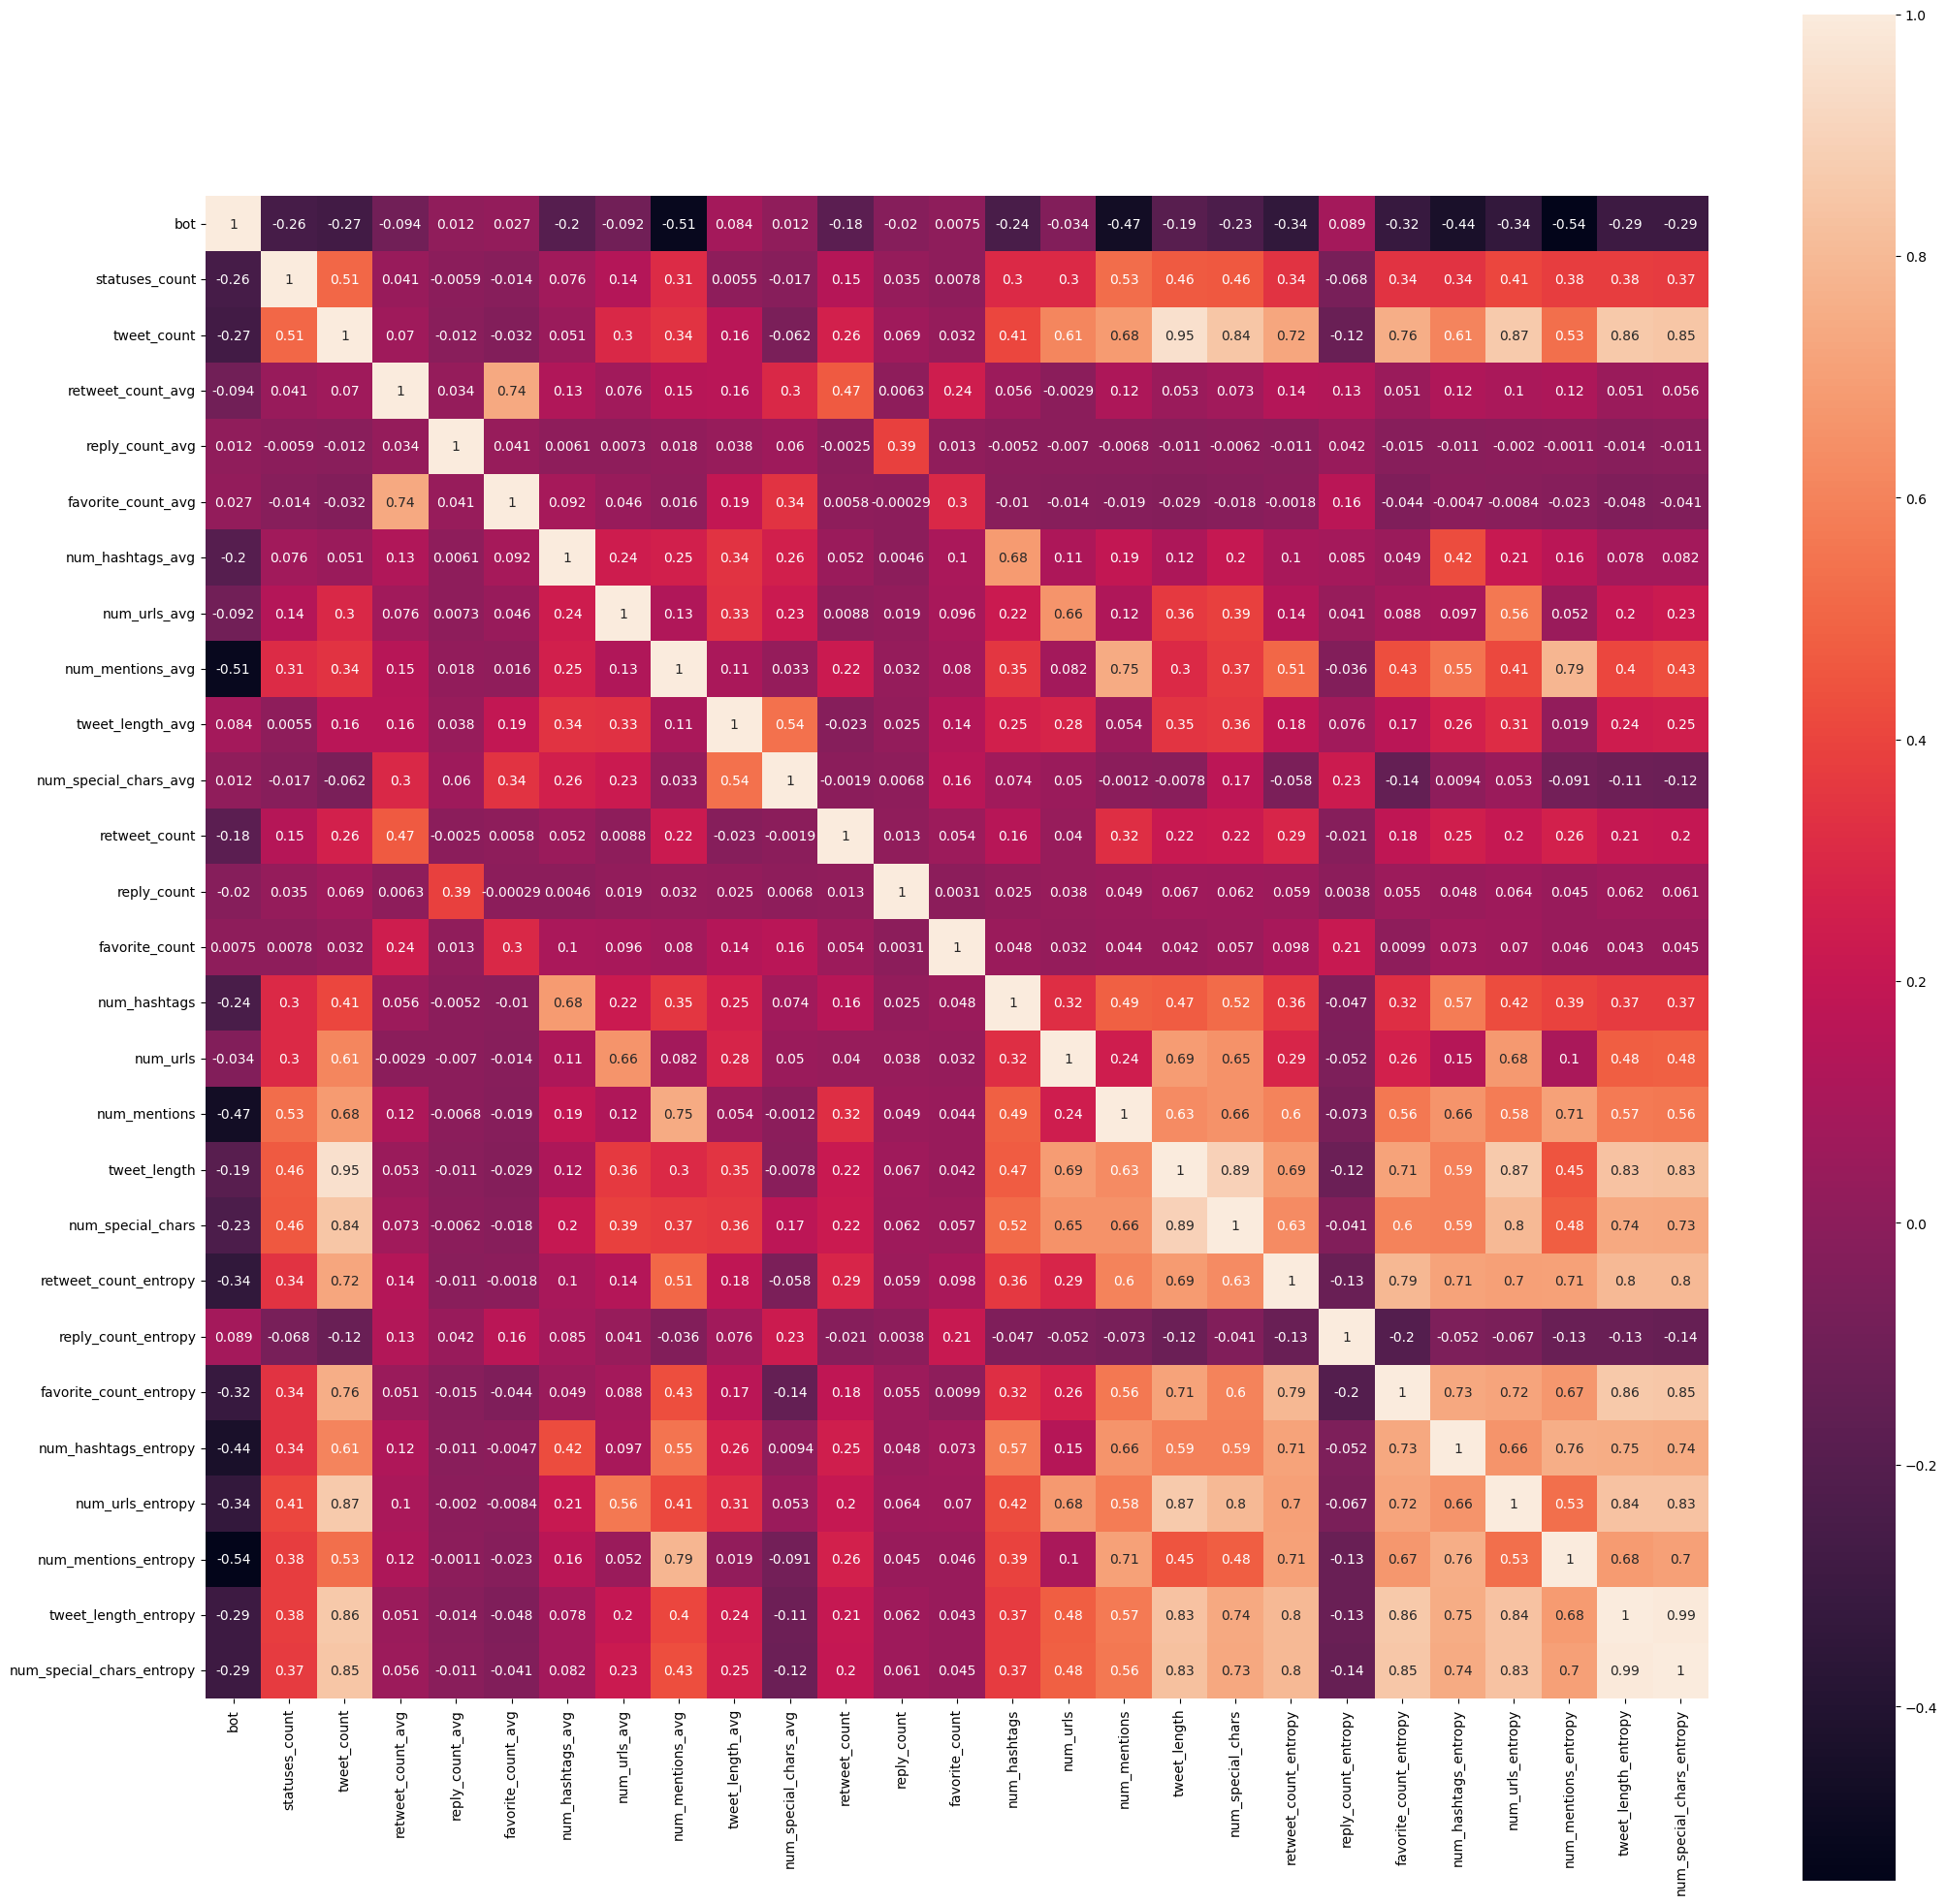

In [27]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

In [28]:
for i in range(27):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.8:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])

tweet_length  -  tweet_count  -  0.9538796104071481
num_special_chars  -  tweet_count  -  0.8433422515413296
num_special_chars  -  tweet_length  -  0.8948586985051256
num_urls_entropy  -  tweet_count  -  0.8660114576237744
num_urls_entropy  -  tweet_length  -  0.8661855303699411
tweet_length_entropy  -  tweet_count  -  0.8594384148388088
tweet_length_entropy  -  tweet_length  -  0.8317620683992684
tweet_length_entropy  -  favorite_count_entropy  -  0.8570152645967619
tweet_length_entropy  -  num_urls_entropy  -  0.8366785765032893
num_special_chars_entropy  -  tweet_count  -  0.8481040105332633
num_special_chars_entropy  -  tweet_length  -  0.8260713044621196
num_special_chars_entropy  -  favorite_count_entropy  -  0.8541069159898369
num_special_chars_entropy  -  num_urls_entropy  -  0.8348783195045102
num_special_chars_entropy  -  tweet_length_entropy  -  0.9925011483126704


In [29]:
del df_users["num_special_chars_entropy"]
del df_users["tweet_length_entropy"]
del df_users["tweet_length"]
del df_users["num_special_chars"]
del df_users["num_urls_entropy"]

# Save to file

In [30]:
df_users.to_hdf(destDatasetPath, 'df_users', mode='w')

c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\pytables.py:314: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->axis1] [items->None]

  f(store)


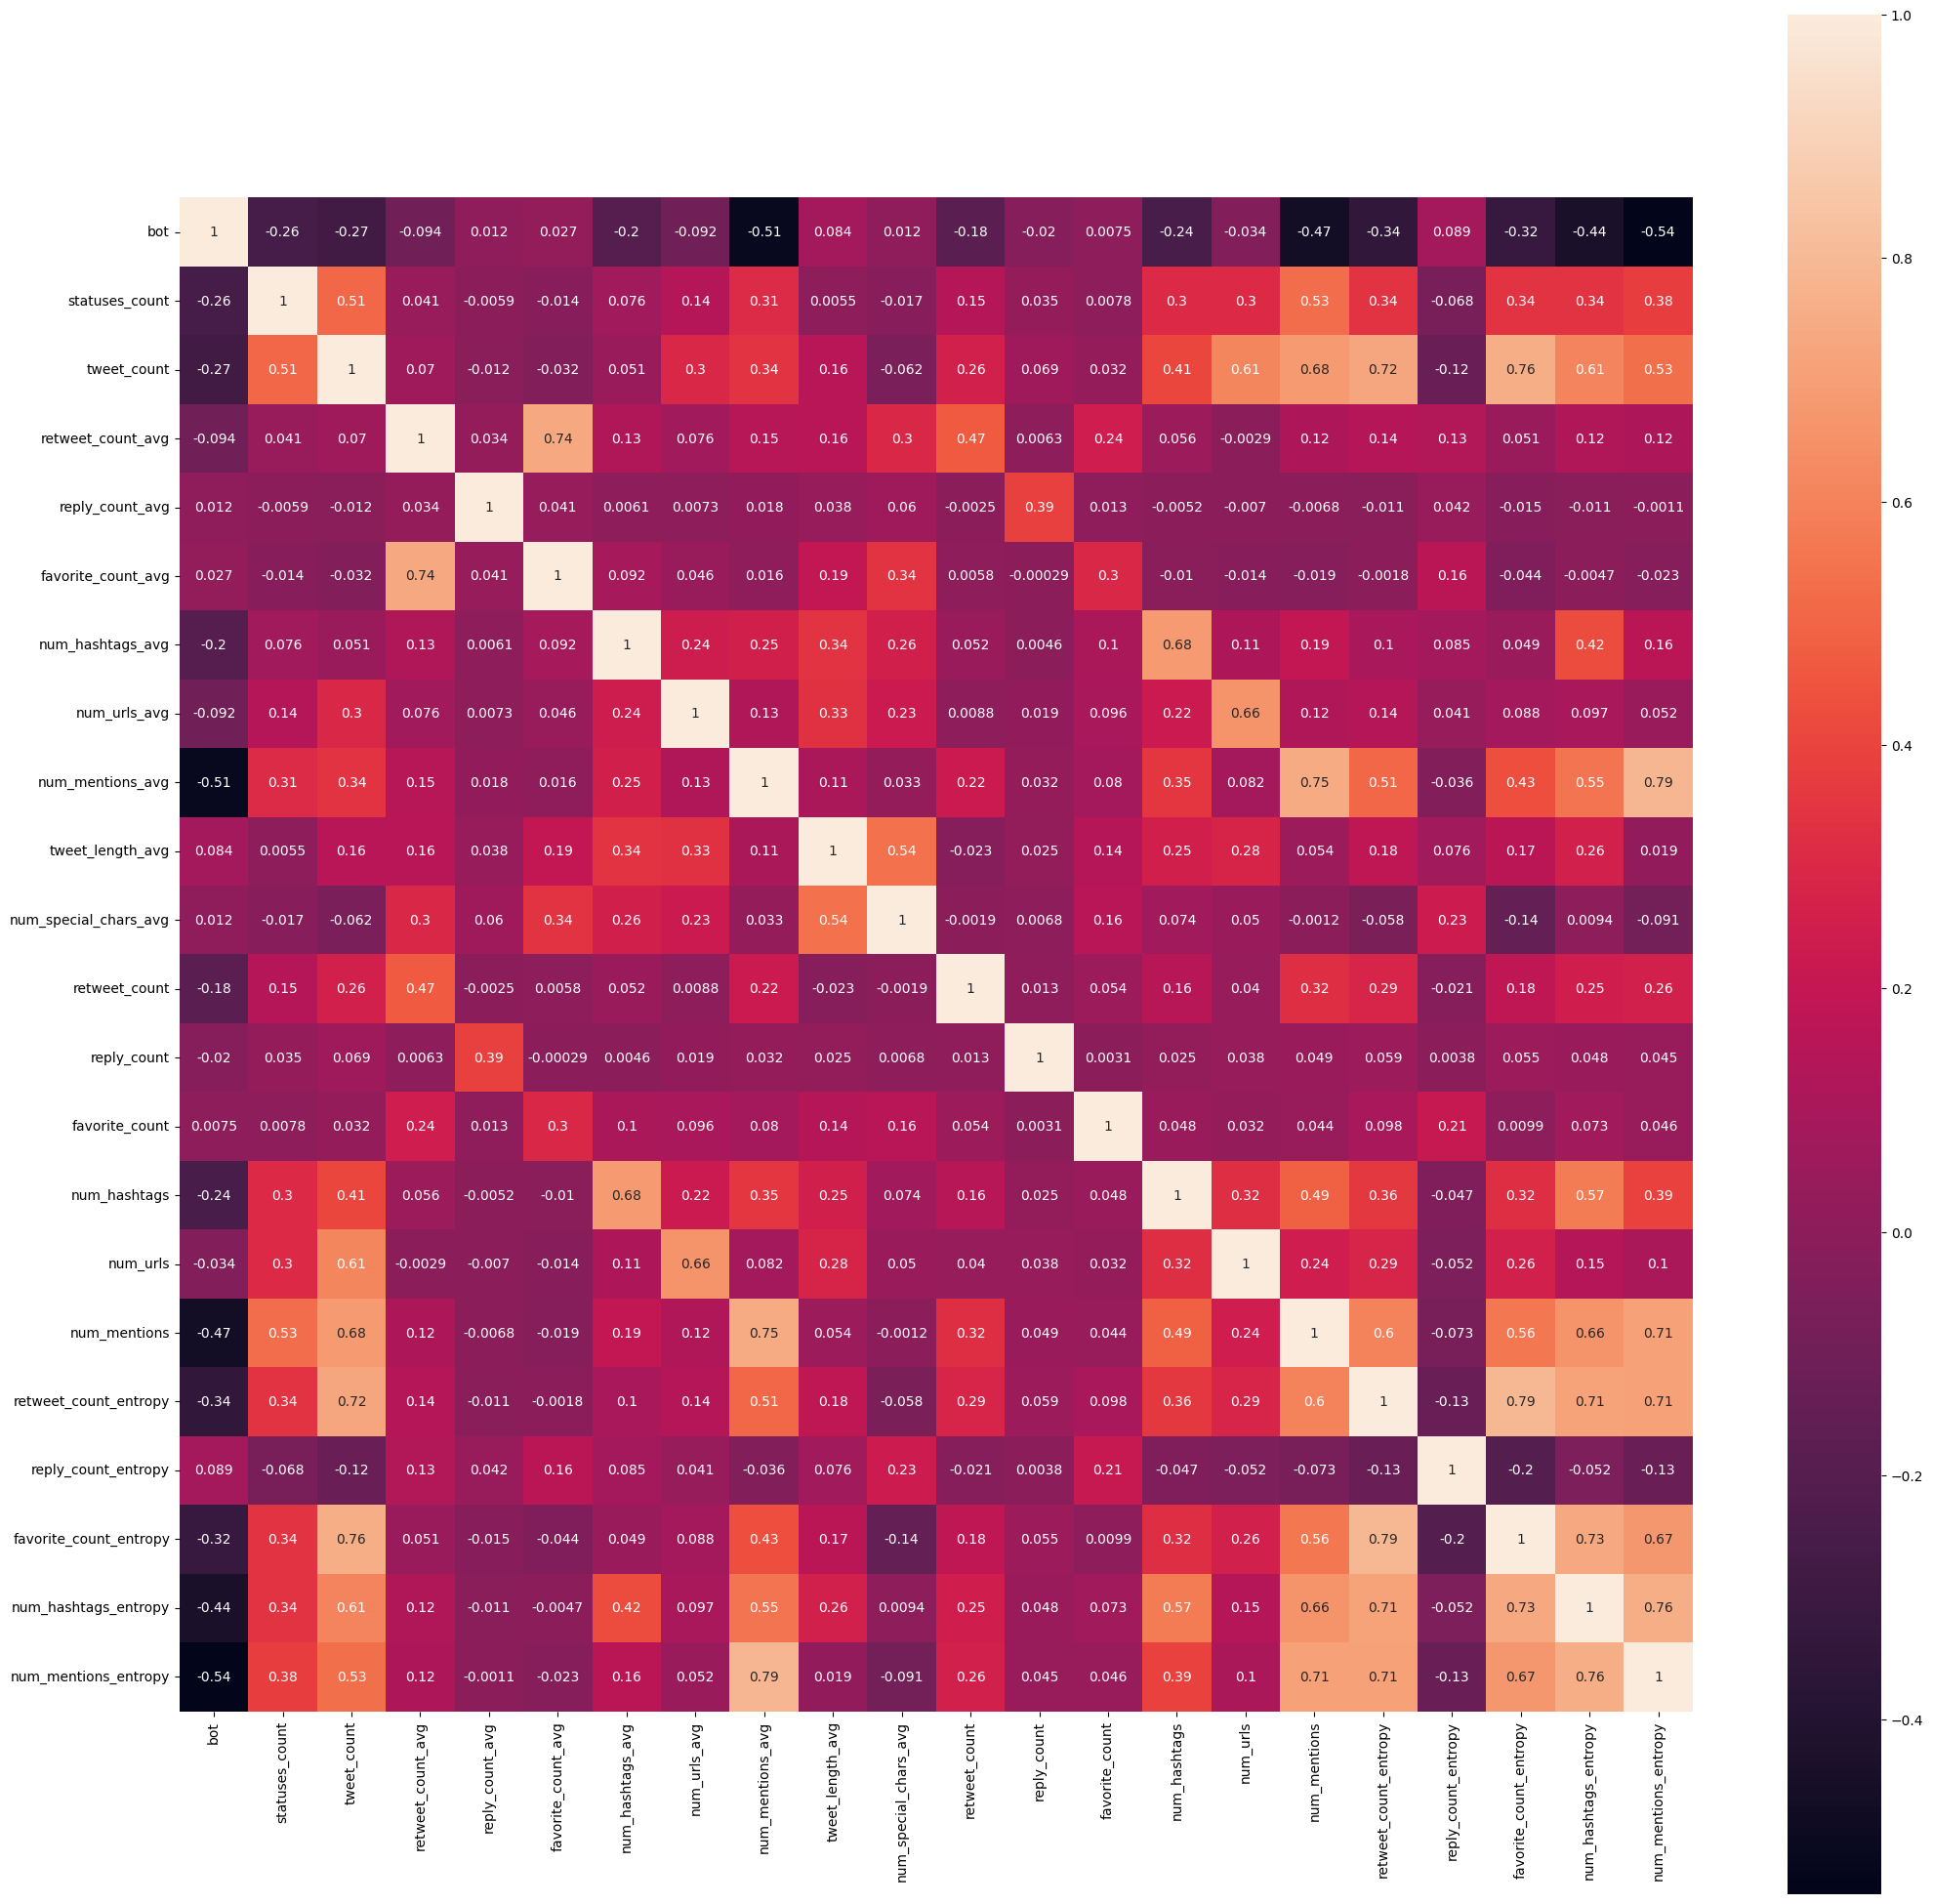

In [31]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

In [33]:
for i in range(22):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.8:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])